**Importing libraries

In [3]:
!Pip install opencv-python
!Pip install tensorflow
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("tensorflow version:", tf.__version__)

tensorflow version: 2.16.1


In [4]:
images=glob("train/**/*")

In [5]:
print(type(images)) 
print(images)         

<class 'list'>
['train\\angry\\Training_10118481.jpg', 'train\\angry\\Training_10120469.jpg', 'train\\angry\\Training_10131352.jpg', 'train\\angry\\Training_10161559.jpg', 'train\\angry\\Training_1021836.jpg', 'train\\angry\\Training_10269675.jpg', 'train\\angry\\Training_10278738.jpg', 'train\\angry\\Training_10290703.jpg', 'train\\angry\\Training_10295477.jpg', 'train\\angry\\Training_10315441.jpg', 'train\\angry\\Training_10316849.jpg', 'train\\angry\\Training_10333072.jpg', 'train\\angry\\Training_10334355.jpg', 'train\\angry\\Training_10345473.jpg', 'train\\angry\\Training_10422050.jpg', 'train\\angry\\Training_10485618.jpg', 'train\\angry\\Training_10503476.jpg', 'train\\angry\\Training_10524198.jpg', 'train\\angry\\Training_10539399.jpg', 'train\\angry\\Training_10592361.jpg', 'train\\angry\\Training_10595751.jpg', 'train\\angry\\Training_10608067.jpg', 'train\\angry\\Training_10740356.jpg', 'train\\angry\\Training_10851653.jpg', 'train\\angry\\Training_10857340.jpg', 'train\\an

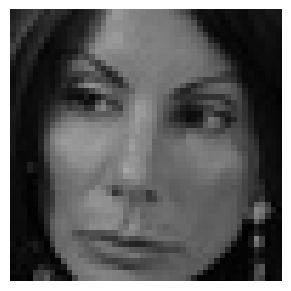

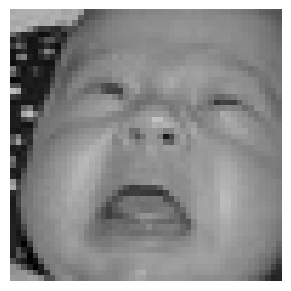

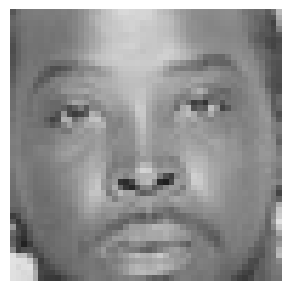

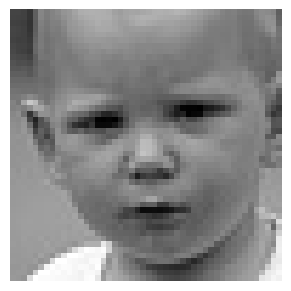

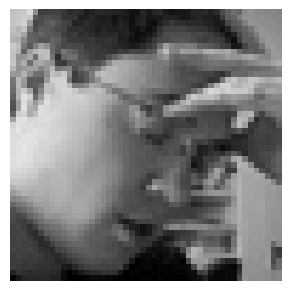

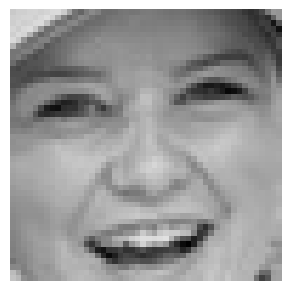

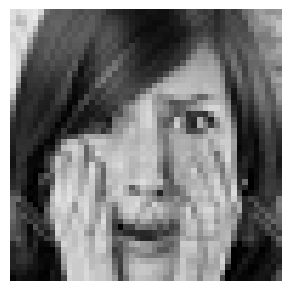

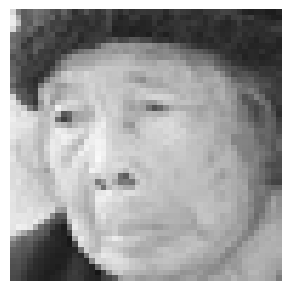

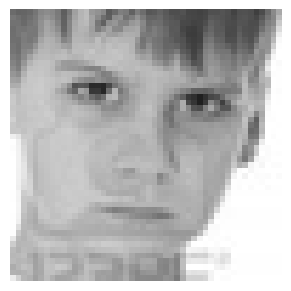

In [6]:

for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')
    
    
    

**prepation of data**

In [7]:
img_size = 48
batch_size = 64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size= (img_size, img_size) ,
                                                    color_mode = "grayscale",
                                                    batch_size= batch_size,
                                                    class_mode = "categorical",
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.


In [8]:
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size= (img_size, img_size) ,
                                                    color_mode = "grayscale",
                                                    batch_size= batch_size,
                                                    class_mode = "categorical",
                                                    shuffle=True)

Found 7178 images belonging to 7 classes.


In [ ]:
**Defining Model**

In [9]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [10]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [11]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [12]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
**Initialising the model**

In [15]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [ ]:
**Traning the Model**

In [16]:
history = model.fit(
x = train_generator,
steps_per_epoch =steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5999 - loss: 1.0636
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 89s 198ms/step - accuracy: 0.5999 - loss: 1.0636 - val_accuracy: 0.5656 - val_loss: 1.1400
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:20 181ms/step - accuracy: 0.5312 - loss: 1.2086
Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.5312 - loss: 0.6056 - val_accuracy: 0.4000 - val_loss: 0.5815
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.6057 - loss: 1.0496
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 91s 202ms/step - accuracy: 0.6057 - loss: 1.0496 - val_accuracy: 0.5926 - val_loss: 1.0877
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:15 169ms/step - accuracy: 0.7188 - loss: 0.8525
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.7188 - loss: 0.4272 - val_ac

In [ ]:
**Model Evaluation**

In [15]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.6076 - loss: 1.0841


[1.0664832592010498, 0.6118695735931396]

In [ ]:
**Plotting Loss**

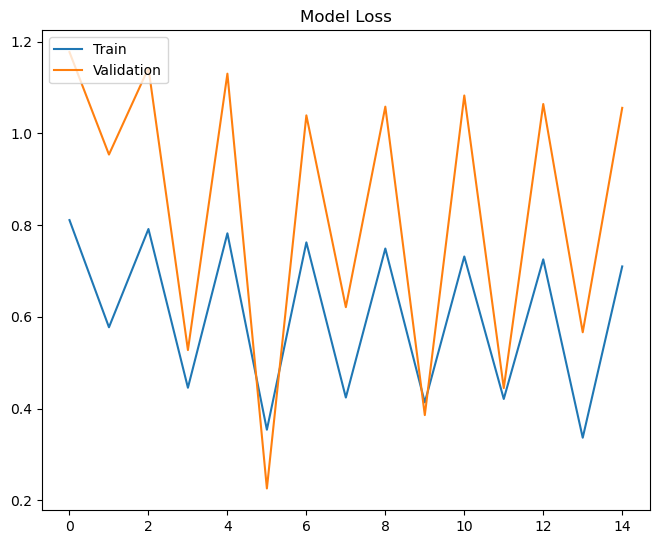

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

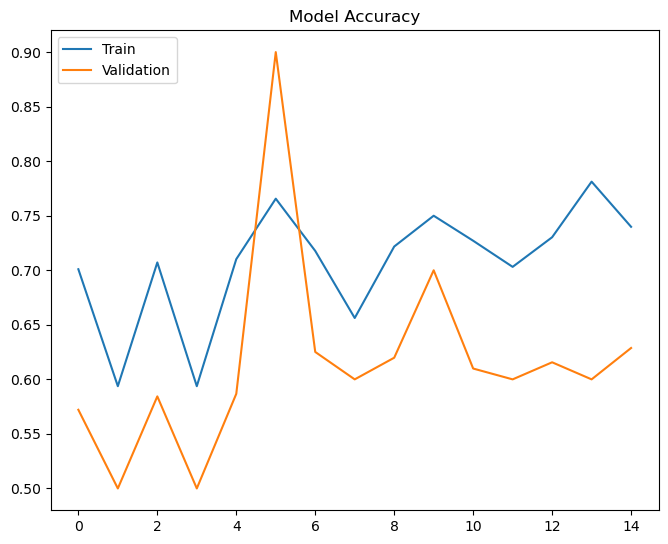

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [ ]:
**Saving Model**

In [89]:
model_json = model.to_json()
with open("modeljson","w") as json_file:
    json_file.write(model_json)